#  Analyzing San Fransisco City Salaries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

salaries = pd.read_csv('salaries.csv')
print(salaries.head())

   Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

  BasePay OvertimePay OtherPay Benefits   TotalPay  TotalPayBenefits  Year  \
0  167411           0   400184      NaN  567595.43         567595.43  2011   
1  155966      245132   137811      NaN  538909.28         538909.28  2011   
2  212739      106088  16452.6      NaN  335279.91         335279.91  2011   
3   77916     56120.7   198307      NaN  332343.61         332343.61  2011   
4  134402        9737   182235      NaN  326373.19         326373.19  2011   

   Notes         Agency Status  
0    NaN  San Francisco    NaN  
1    NaN

## ** Data Cleaning **

Upon viewing the first couple of rows in the Salaries dataframe, there are a few adjustments that can be made to make our analysis easier:

- I only want to look at the Total Pay column in analyzing salaries, so I will reduce the number of columns
- I will break the employee name column into two columns(First name, last name)
- I will lowercase the names columns, and the jobtitle column

** Below is the resulting dataframe **

In [2]:
columns = ['Id','Last Name', 'First Name', 'JobTitle','TotalPay', 'Year', 'Agency']
x, y = salaries['EmployeeName'], salaries['JobTitle']

salaries['JobTitle'] = y.str.strip().str.lower()
salaries['EmployeeName'] = x.str.strip().str.lower()
salaries['First Name'], salaries['Last Name'] = x.str.split().str[0], x.str.split().str[1]
salaries.drop('EmployeeName', axis = 1, inplace = True)
salaries = salaries[columns]
salaries.head()

,Id,Last Name,First Name,JobTitle,TotalPay,Year,Agency
0,1,ford,nathaniel,general manager-metropolitan transit authority,567595.43,2011,San Francisco
1,2,jimenez,gary,captain iii (police department),538909.28,2011,San Francisco
2,3,pardini,albert,captain iii (police department),335279.91,2011,San Francisco
3,4,chong,christopher,wire rope cable maintenance mechanic,332343.61,2011,San Francisco
4,5,gardner,patrick,"deputy chief of department,(fire department)",326373.19,2011,San Francisco


In [3]:
names = ['last name', 'first name', 'gender', 'race']
bm_names = pd.read_csv('Black-Male-Names.csv', names = names)
hm_names = pd.read_csv('Hispanic-Male-Names.csv', names = names)
wm_names = pd.read_csv('White-Male-Names.csv', names = names)
bf_names = pd.read_csv('Black-Female-Names.csv', names = names)
hf_names = pd.read_csv('Hispanic-Female-Names.csv', names = names)
wf_names = pd.read_csv('White-Female-Names.csv', names = names)
im_names = pd.read_csv('Indian-Male-Names.csv')
if_names = pd.read_csv('Indian-Female-Names.csv')

In [4]:
files = [im_names, if_names]
for file in files:
    a = file['name']
    columns = ['Last name', 'First name', 'gender', 'race']
    columns_dict = {'Last name': 'last name','First name': 'first name'}
    file['First name'],file['Last name'] = a.str.split().str[0], a.str.split().str[1]
    file.drop('name', axis = 1, inplace = True)

im_names = im_names[columns]
im_names.rename(columns = columns_dict, inplace = True)
if_names = if_names[columns]
if_names.rename(columns = columns_dict, inplace = True)


In [5]:
male_names = pd.concat([bm_names, hm_names, wm_names, im_names])
female_names = pd.concat([bf_names, hf_names, wf_names, if_names])
female_names.drop(female_names.index[[0]], inplace = True)

In [6]:
x = male_names['first name']
y = female_names['first name']
male_names['first name'], female_names['first name'] = x.str.split().str[0],y.str.split().str[0]

I will also be adding a gender column to our salaries dataframe.
In order to do that I had to attain many datasets with which included a names column and gender column, and combine them, to create a masterlist of names by gender.

** Below are the first couple of rows of our master list **

In [7]:
names_df = pd.concat([male_names, female_names])
names_df['first name'] = names_df['first name'].str.strip().str.lower()
names_df.drop([0], inplace = True)
print(names_df.head())
print(names_df.shape)

  last name first name gender   race
1     aaron      aaric      m  black
2     aaron  dominique      m  black
3     aaron   fredrick      m  black
4     aaron     jarvis      m  black
5     aaron    lorenzo      m  black
(120775, 4)


In [8]:
names_df = names_df.reset_index().drop_duplicates(subset='first name', keep='last').set_index('first name')

** Here is the first 5 rows of our salaries dataset with the gender column, mapped from our names by gender master list **

In [9]:
salaries['gender'], salaries['race'] = salaries['First Name'].map(names_df.gender), salaries['First Name'].map(names_df.race)
all_groups = salaries.groupby(['Year'],as_index=False).mean()
print(salaries.head())






   Id Last Name   First Name                                        JobTitle  \
0   1      ford    nathaniel  general manager-metropolitan transit authority   
1   2   jimenez         gary                 captain iii (police department)   
2   3   pardini       albert                 captain iii (police department)   
3   4     chong  christopher            wire rope cable maintenance mechanic   
4   5   gardner      patrick    deputy chief of department,(fire department)   

    TotalPay  Year         Agency gender   race  
0  567595.43  2011  San Francisco      m  white  
1  538909.28  2011  San Francisco      m  white  
2  335279.91  2011  San Francisco      m  white  
3  332343.61  2011  San Francisco      m  white  
4  326373.19  2011  San Francisco      m  white  


## **Analysis**

** First, I want to see the overall trend in salaries for all jobs for 2011 - 2014 **
- **  Below,we see that there generally was an overall increase in salaries, with a dip in 2014 **

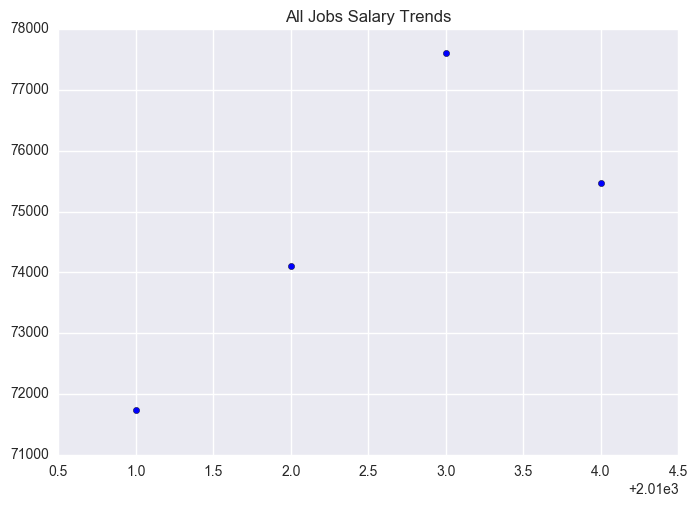

In [10]:
def scatter(df, name):
    plt.scatter(df.Year, df.TotalPay)
    plt.title('{} Salary Trends'.format(name))
    plt.show()
    plt.clf()

scatter(all_groups, 'All Jobs')

In [11]:
def boxplots(df):
    fig = plt.figure(figsize=(17,8))
    ax1 = fig.add_subplot(1,4,1)
    ax2 = fig.add_subplot(1,4,2)
    ax3 = fig.add_subplot(1,4,3)
    ax4 = fig.add_subplot(1,4,4)
    f2011salary = df['TotalPay'][(df.Year == 2011)&(df.gender == 'f')]
    m2011salary = df['TotalPay'][(df.Year == 2011)&(df.gender == 'm')]
    f2012salary = df['TotalPay'][(df.Year == 2012)&(df.gender == 'f')]
    m2012salary = df['TotalPay'][(df.Year == 2012)&(df.gender == 'm')]
    f2013salary = df['TotalPay'][(df.Year == 2013)&(df.gender == 'f')]
    m2013salary = df['TotalPay'][(df.Year == 2013)&(df.gender == 'm')]
    f2014salary = df['TotalPay'][(df.Year == 2014)&(df.gender == 'f')]
    m2014salary = df['TotalPay'][(df.Year == 2014)&(df.gender == 'm')]
    ax1.boxplot([f2011salary, m2011salary])
    ax2.boxplot([f2012salary, m2012salary])
    ax3.boxplot([f2013salary, m2013salary])
    ax4.boxplot([f2014salary, m2014salary])
    ax1.set(xlabel="Female vs. Male", ylabel = "Salary", title = "2011", xlim = (0,3), ylim = (0,250000))
    ax2.set(xlabel="Female vs. Male", ylabel = "Salary", title = "2012", xlim = (0,3), ylim = (0,250000))
    ax3.set(xlabel="Female vs. Male", ylabel = "Salary", title = "2013", xlim = (0,3), ylim = (0,250000))
    ax4.set(xlabel="Female vs. Male", ylabel = "Salary", title = "2014", xlim = (0,3), ylim = (0,250000))
    if df is salaries:
        sup1 = fig.suptitle('All Jobs: Female vs Male Salary Distributions')
    else:
        sup2 = fig.suptitle('{}: Female vs Male Salary Distributions'.format(df.reset_index().JobTitle[0]))
    plt.show()
    plt.clf()
    print('Counts by Gender:\n2011: female: {}, male: {}\n2012: female: {}, male: {}\n2013: female: {}, male: {}\n2014: female: {}, male: {}'.format(f2011salary.shape[0], m2011salary.shape[0], f2012salary.shape[0], m2012salary.shape[0], f2013salary.shape[0], m2013salary.shape[0], f2014salary.shape[0], m2014salary.shape[0]))

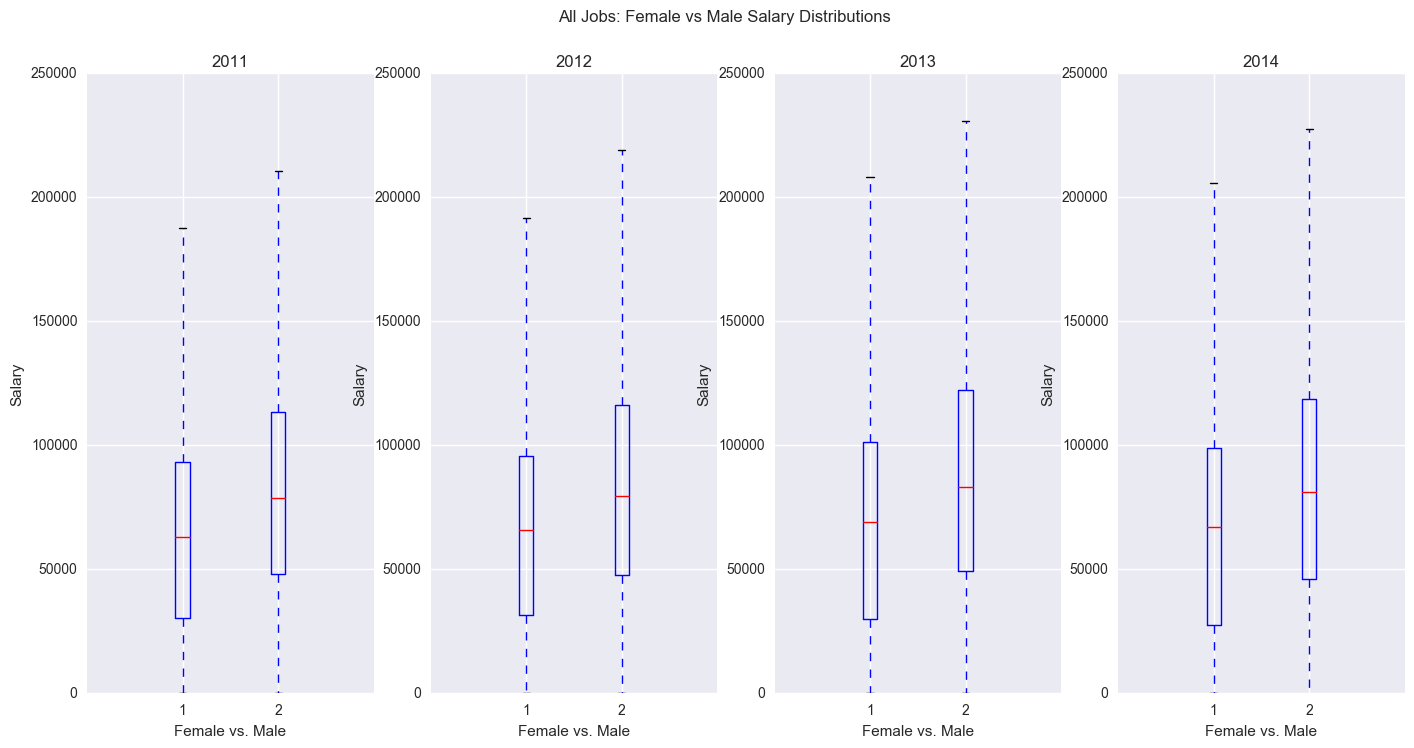

Counts by Gender:
2011: female: 12771, male: 16372
2012: female: 12975, male: 16549
2013: female: 13241, male: 16879
2014: female: 13205, male: 17177


In [12]:
boxplots(salaries)

** Above, we can see that men, have been averaging a higher salary overall, every year, from 2011 to 2014. **

** Next I want to look at certain jobs, to see if the above results hold true across many professions. **

** In order to do that, I have created a dictionary, with these professions, and the number of people employed in that particular profession. **

In [13]:
job_dict ={}
job_titles = salaries['JobTitle']
for job in job_titles:
    if job in job_dict:
        job_dict[job] += 1
    else:
        job_dict[job] = 1
        
print(sorted(job_dict.items(), key=lambda x:x[1], reverse = True))

[('transit operator', 9424), ('special nurse', 5791), ('registered nurse', 4955), ('custodian', 3214), ('firefighter', 3153), ('recreation leader', 2663), ('deputy sheriff', 2618), ('public svc aide-public works', 2518), ('police officer 3', 2421), ('patient care assistant', 1945), ('public service trainee', 1656), ('attorney (civil/criminal)', 1503), ('police officer', 1476), ('porter', 1465), ('general laborer', 1410), ('gardener', 1187), ('police officer 2', 1141), ('parking control officer', 1140), ('library page', 1107), ('senior clerk', 1064), ('senior clerk typist', 1055), ('sergeant 3', 1047), ('clerk', 983), ('eligibility worker', 980), ('emt/paramedic/firefighter', 918), ('licensed vocational nurse', 901), ('stationary engineer', 886), ('nurse practitioner', 881), ('senior eligibility worker', 879), ('protective services worker', 824), ('museum guard', 821), ('transit supervisor', 812), ('senior administrative analyst', 806), ('police officer iii', 779), ('medical evaluations

Based on the above dictionary, **Transit Operators ** represent a good amount of people in this dataset. I will also look at ** Registered Nurses **, and ** Firefighters **

In [14]:
transitjob = salaries[salaries.JobTitle == 'transit operator']

In [15]:
transit_group = transitjob.groupby(['Year'],as_index=False).mean()

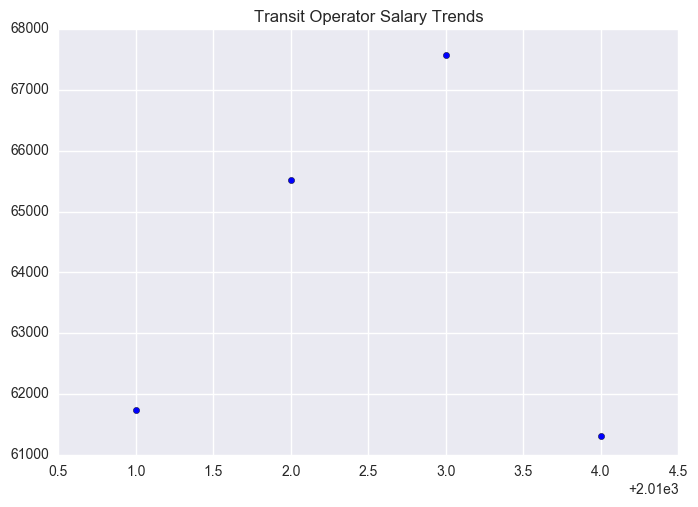

In [16]:
scatter(transit_group, 'Transit Operator')

** Here we see a very similar trend for Transit Operators, where there has been an increase from 2011 - 2013, and a drop in 2014 **

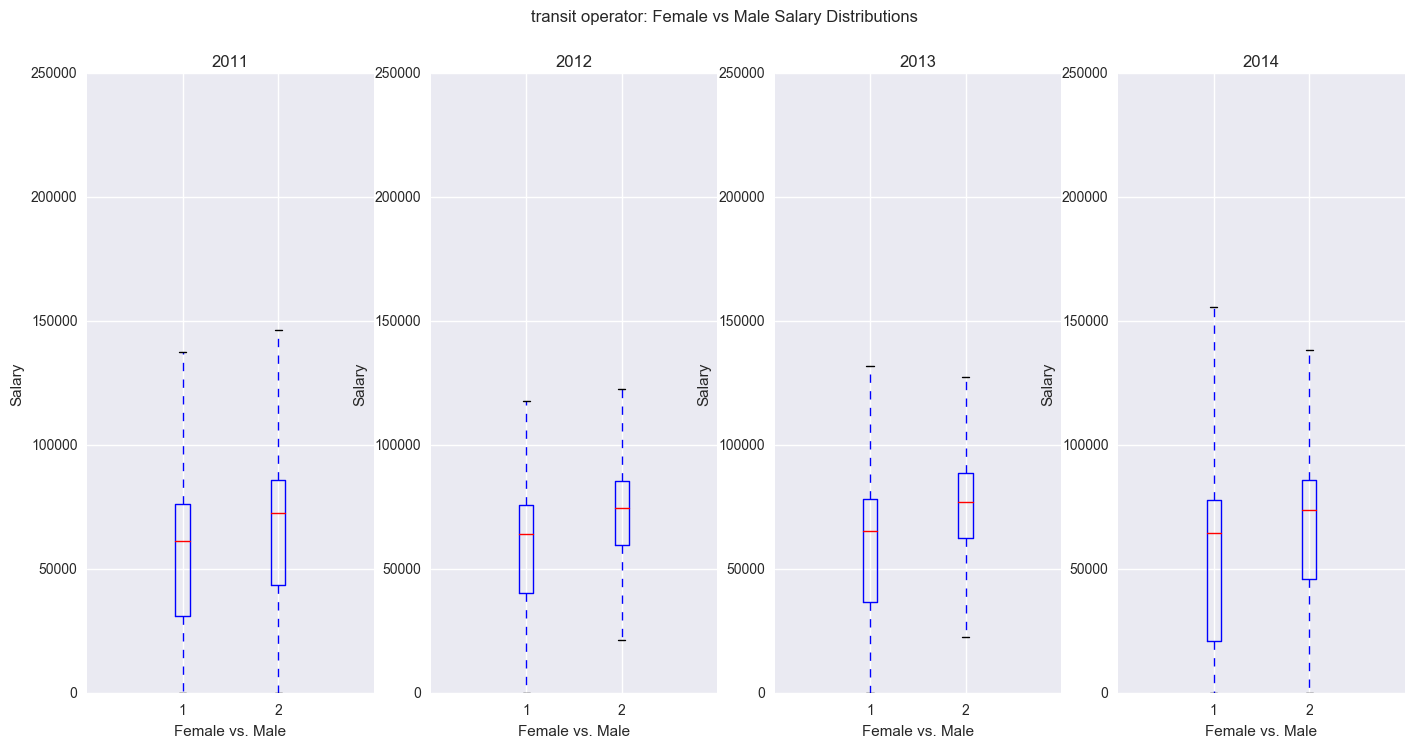

Counts by Gender:
2011: female: 468, male: 1447
2012: female: 452, male: 1357
2013: female: 475, male: 1341
2014: female: 497, male: 1430


In [17]:
boxplots(transitjob)

** Among Transit Operators, we can see that the same holds true here as far as Female vs Male total salaries. Men are generally better paid, but we can see an intersting fact here: **
-  ** In 2013 and 2014, the highest paid person in this job was a woman. **

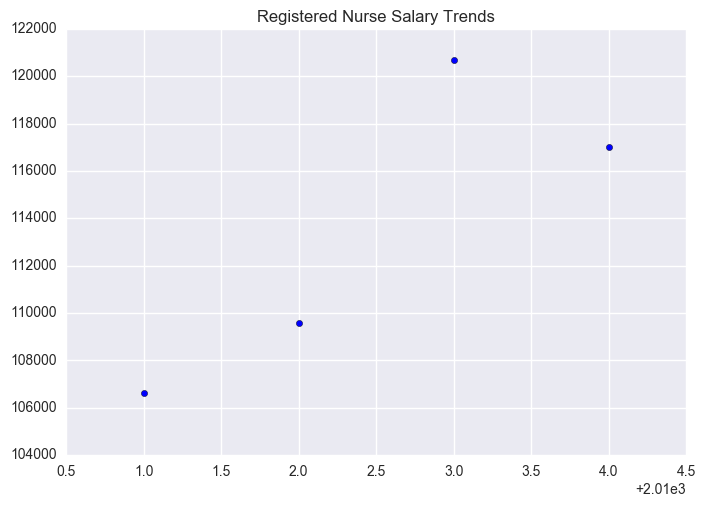

In [18]:
nursejob = salaries[salaries.JobTitle == 'registered nurse']
nurse_group = nursejob.groupby(['Year'],as_index=False).mean()
scatter(nurse_group, 'Registered Nurse')

** For Registered Nurses, salaries are higher than the average. Also, the same trend holds true as we saw earlier. Salaries in 2014 decreased, but the decrease was not so severe in this profession, as in other professions **

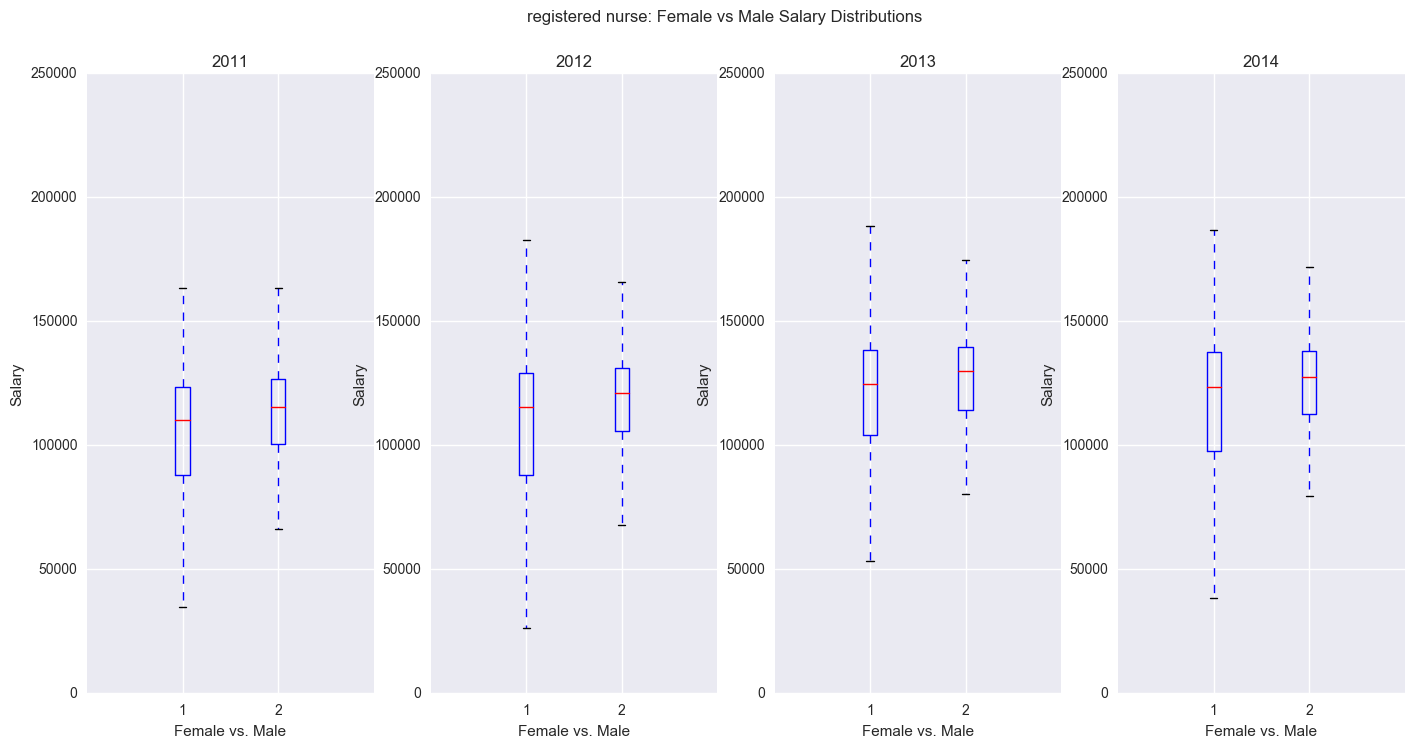

Counts by Gender:
2011: female: 653, male: 191
2012: female: 672, male: 199
2013: female: 640, male: 199
2014: female: 642, male: 207


In [19]:
boxplots(nursejob)

** Also We can see that this is a very female driven profession. While men are still averaging higher salaries, the difference between the two is alot smaller than other professions, and in every year, the highest paid person is a woman. **

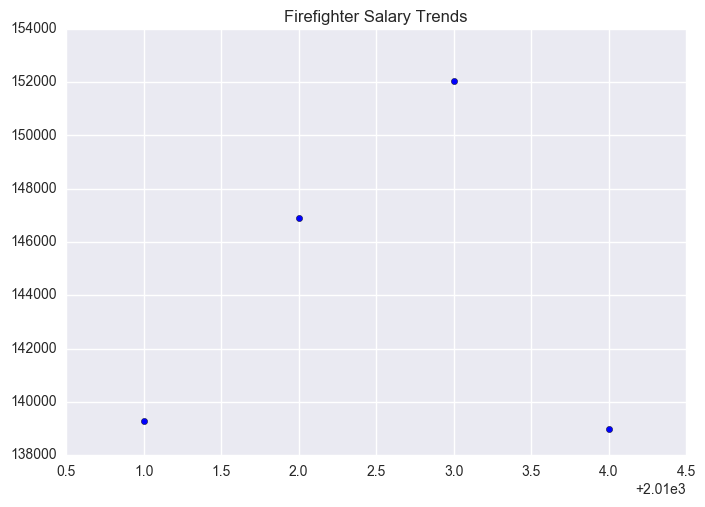

In [20]:
firefighter = salaries[salaries.JobTitle == 'firefighter']
firefighter_group = firefighter.groupby(['Year'],as_index=False).mean()
scatter(firefighter_group, 'Firefighter')

** Firefighters are also a very well paid group **

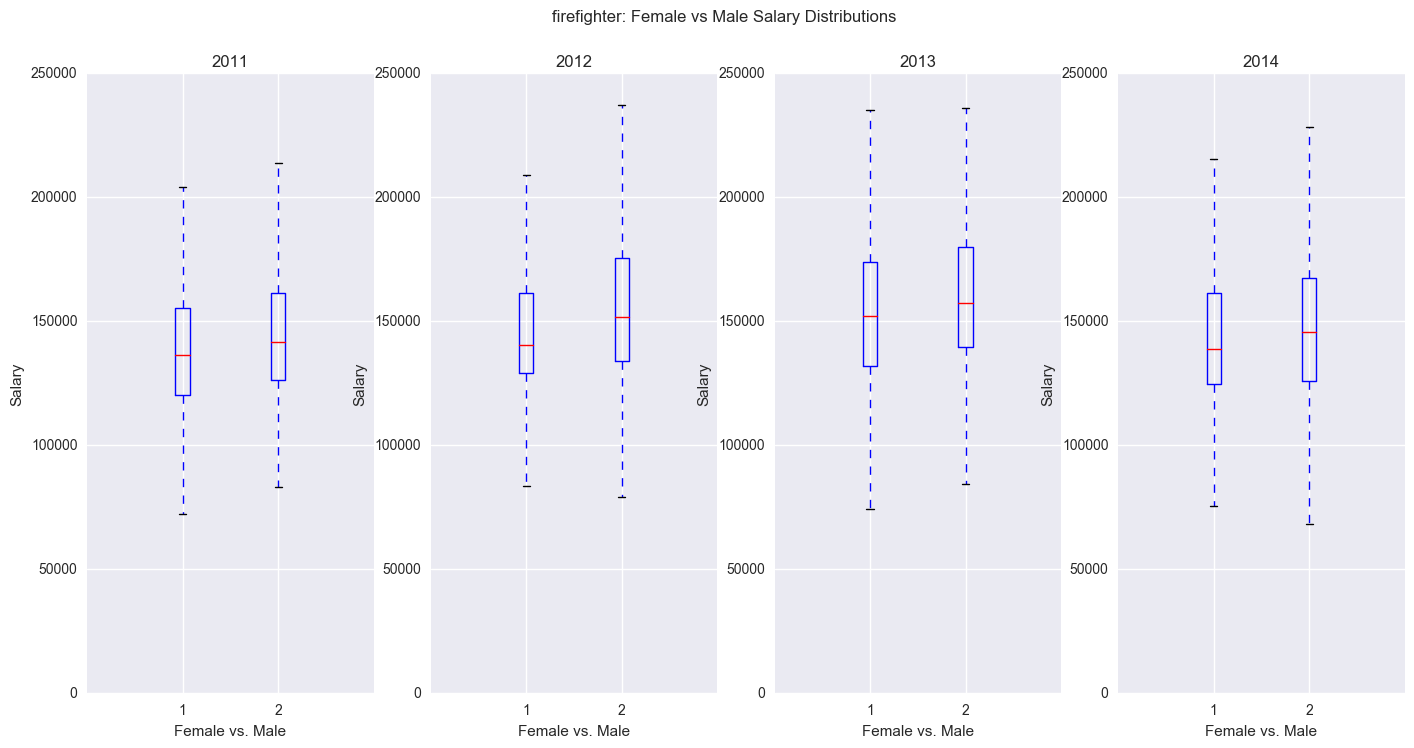

Counts by Gender:
2011: female: 167, male: 565
2012: female: 157, male: 542
2013: female: 155, male: 565
2014: female: 150, male: 602


In [21]:
boxplots(firefighter)

** For Firefighters, salaries are well above average. Amongst Firefighters, women make up only about 20% of all Firefighters, and the same holds true once again. Women are averaging a lower salary than men.**

# Conclusion 

## Is there gender discrimination based on San Francisco City data?
- ### Nothing definitive can be said, just yet. We looked at overall salary trends, and salary for different professions, and it is clear the men are earning more on average, but our dataset was very limited.|
    - ** Important information that we do not know: **
        - How many years of schooling does each person have?
        - How many hours on average to they work?
        - How many years of experience do they have?
        - Are they married? / Have children?
        - How good/bad is their health?
- ** While this is a good initial look into the salary trends, there really is no conclusion that can be made, just yet. **|